In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import Numerov
import utils
import Hartree_XC
import numpy as np
import Atomic_Like_Potential as ALP
from Radial_Eigenfunction import Radial_Eigenfunction

In [3]:
def y(x):
    return np.exp(x**2.0)

def yp(x,y):
    return 2.0*x*y

In [4]:
#rk4 dev 
h=0.001
grid= np.arange(0.0, 2.0, h)

In [5]:
y_func= y(grid)

In [6]:
#w=[y_func[i] for i in range(4)]

In [7]:
w=[y_func[0]]

In [8]:
#RK4
for i, xi in enumerate(grid[:3]):
    k=4*[0.0]
    for j in range(4):
        if j == 0:
            k[j]= h*yp(xi,w[i])
        elif j == 1 or j == 2:
            k[j]= h*yp(xi+ 0.5*h,w[i] + 0.5*k[j-1])
        else:
            k[j]= h*yp(xi+h, w[i]+k[j-1])
    w.append(w[i] + (1.0/6.0)*(k[0] + 2.0*k[1] + 2.0*k[2] + k[3]))
#predictor corrector
for i in range(4,len(grid)):
    wp= w[i-1] + h*(55.0*yp(grid[i-1], w[i-1]) - 59.0*yp(grid[i-2], w[i-2])
                   +37.0*yp(grid[i-3], w[i-3]) - 9.0*yp(grid[i-4], w[i-4]))/24.0
    
    wc= w[i-1] + h*(9.0*yp(grid[i], wp) + 19.0*yp(grid[i-1], w[i-1])
                   -5.0*yp(grid[i-2], w[i-2]) + yp(grid[i-3], w[i-3]))/24.0
    w.append(wc)

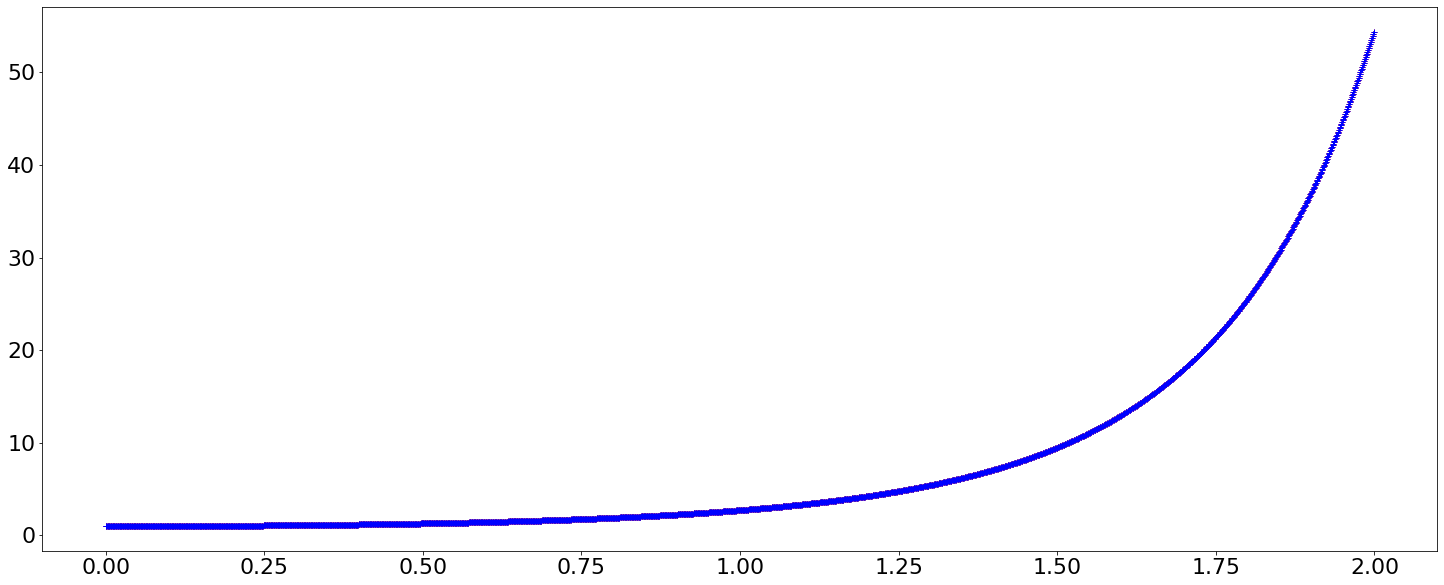

In [10]:
plt.plot(grid,np.array(w),'r+', grid,y_func,'b+')
plt.show()

In [11]:
np.abs(np.array(w)- y_func)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.69168857e-09, 1.70200565e-09, 1.71234404e-09])

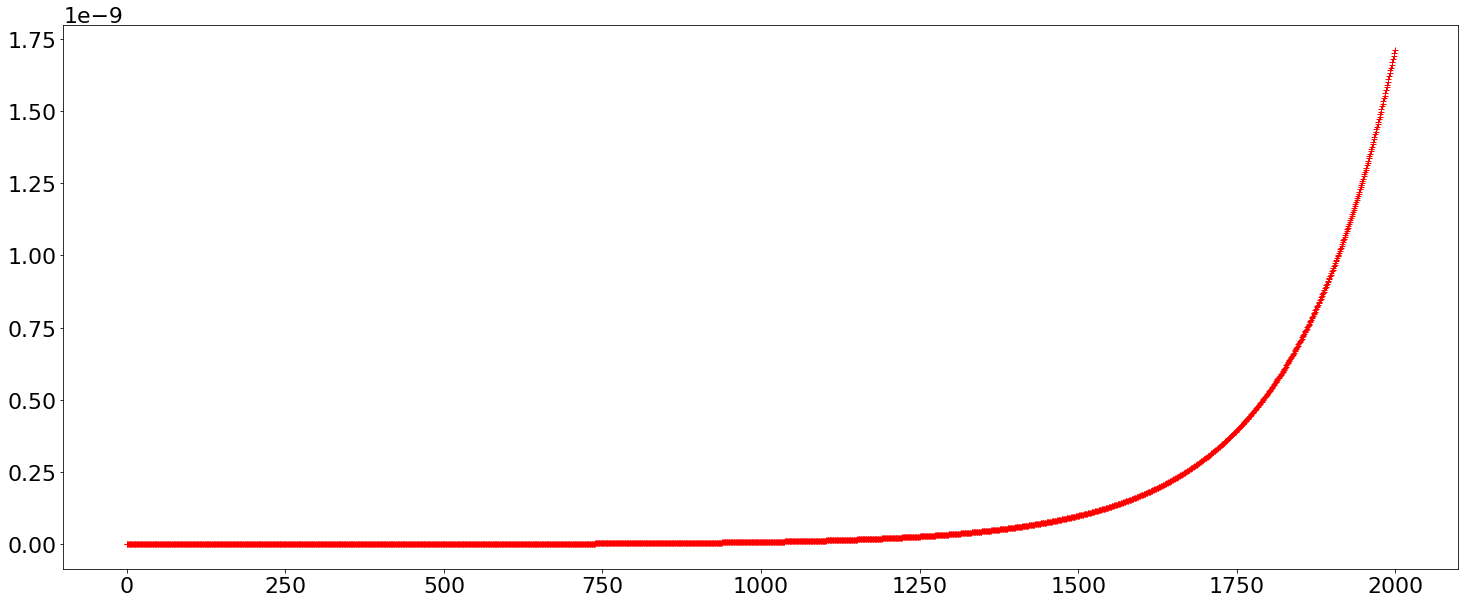

In [12]:
plt.plot([*range(len(np.abs(np.array(w)- y_func)))],np.abs(np.array(w)- y_func),'r+')
plt.show()